In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree
from sklearn.svm import SVC
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score


In [25]:
data = pd.read_csv('DB_Voice_Features.csv')

dataset = pd.DataFrame(data, columns=["MDVP:Fo(Hz)","MDVP:Fhi(Hz)","MDVP:Flo(Hz)","MDVP:Jitter(%)","MDVP:Jitter(Abs)","MDVP:RAP","MDVP:PPQ","Jitter:DDP","MDVP:Shimmer","MDVP:Shimmer(dB)","Shimmer:APQ3","Shimmer:APQ5","MDVP:APQ","Shimmer:DDA","NHR","HNR","status","RPDE","D2","DFA","spread1","spread2","PPE"])

In [26]:
print(dataset.shape)

(195, 23)


In [27]:
print(dataset.head())

   MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   
2      116.682       131.111       111.555         0.01050           0.00009   
3      116.676       137.871       111.366         0.00997           0.00009   
4      116.014       141.781       110.655         0.01284           0.00011   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0   0.00370   0.00554     0.01109       0.04374             0.426  ...   
1   0.00465   0.00696     0.01394       0.06134             0.626  ...   
2   0.00544   0.00781     0.01633       0.05233             0.482  ...   
3   0.00502   0.00698     0.01505       0.05492             0.517  ...   
4   0.00655   0.00908     0.01966       0.06425             0.584  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE        D2       DFA  \
0

In [28]:
print(dataset.describe())

       MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000

In [29]:
print(dataset.groupby('status').size())

status
0     48
1    147
dtype: int64


In [30]:
correlations = dataset.corr()['status'].sort_values(ascending=False)
print(correlations)

status              1.000000
spread1             0.564838
PPE                 0.531039
spread2             0.454842
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
D2                  0.340232
MDVP:Jitter(Abs)    0.338653
RPDE                0.308567
MDVP:PPQ            0.288698
MDVP:Jitter(%)      0.278220
MDVP:RAP            0.266668
Jitter:DDP          0.266646
DFA                 0.231739
NHR                 0.189429
MDVP:Fhi(Hz)       -0.166136
HNR                -0.361515
MDVP:Flo(Hz)       -0.380200
MDVP:Fo(Hz)        -0.383535
Name: status, dtype: float64


In [31]:
informative_att = ['spread1','PPE','spread2','MDVP:Fo(Hz)','MDVP:Flo(Hz)','HNR']

correlation_matrix = dataset[informative_att].corr()

print(correlation_matrix)

               spread1       PPE   spread2  MDVP:Fo(Hz)  MDVP:Flo(Hz)  \
spread1       1.000000  0.962435  0.652358    -0.413738     -0.394857   
PPE           0.962435  1.000000  0.644711    -0.372356     -0.340071   
spread2       0.652358  0.644711  1.000000    -0.249450     -0.243829   
MDVP:Fo(Hz)  -0.413738 -0.372356 -0.249450     1.000000      0.596546   
MDVP:Flo(Hz) -0.394857 -0.340071 -0.243829     0.596546      1.000000   
HNR          -0.673210 -0.692876 -0.431564     0.059144      0.210851   

                   HNR  
spread1      -0.673210  
PPE          -0.692876  
spread2      -0.431564  
MDVP:Fo(Hz)   0.059144  
MDVP:Flo(Hz)  0.210851  
HNR           1.000000  


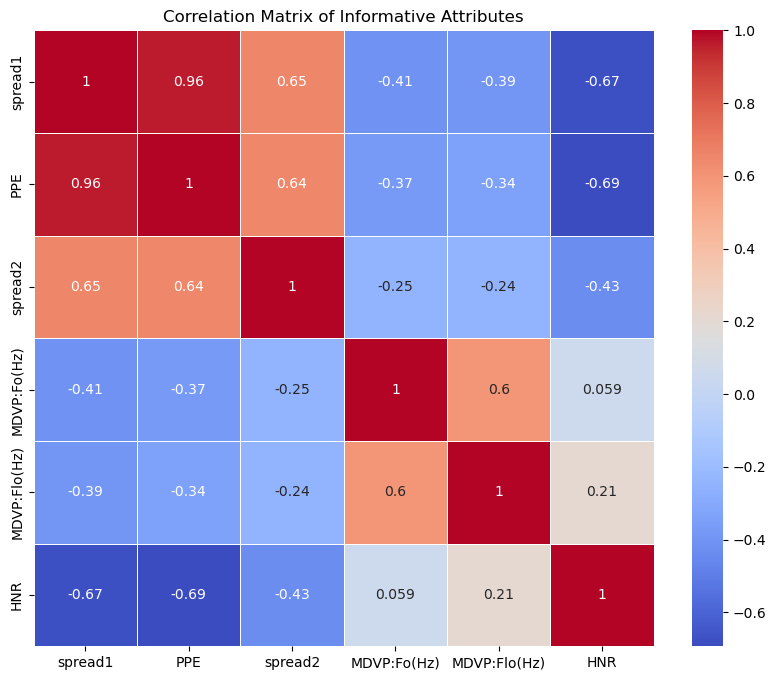

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Informative Attributes')
plt.show()

In [35]:
x = dataset[["spread1", "spread2","MDVP:Fo(Hz)","MDVP:Flo(Hz)","HNR"]]
y = dataset['status']
validation_size = .20
seed = 42

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=validation_size, random_state=seed)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [37]:
model = LogisticRegression(random_state = seed, class_weight='balanced')

model.fit(x_train, y_train)

y_pred_before = model.predict(x_test)

In [40]:
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_before)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_before, average = None)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_before, average = None)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_before, average = None)))

Accuracy Score : 0.8205128205128205
Precision Score : [0.5        0.90322581]
Recall Score : [0.57142857 0.875     ]
F1 Score : [0.53333333 0.88888889]


In [41]:
confusion_matrix_before = confusion_matrix(y_test, y_pred_before)
print("Confusion Matrix:")
print(confusion_matrix_before)

Confusion Matrix:
[[ 4  3]
 [ 4 28]]


In [42]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'penalty': ['l1','l2'],
              'solver': ['newton-cg','lbfgs','liblinear','sag', 'saga']
             }


In [43]:
model_after = LogisticRegression(random_state=seed, class_weight='balanced')
grid_search = GridSearchCV(model_after, param_grid, cv=5, scoring='f1_macro', verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits


c:\Users\parro\anaconda3\envs\sklearn-jupyter\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
105 fits failed out of a total of 350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\parro\anaconda3\envs\sklearn-jupyter\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\parro\anaconda3\envs\sklearn-jupyter\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1_macro', verbose=1)

In [44]:
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [45]:
best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(x_test)

print('Accuracy Score : ' + str(accuracy_score(y_test, y_pred_optimized)))
print('Precision Score : ' + str(precision_score(y_test, y_pred_optimized, average=None)))
print('Recall Score : ' + str(recall_score(y_test, y_pred_optimized, average=None)))
print('F1 Score : ' + str(f1_score(y_test, y_pred_optimized, average=None)))

Accuracy Score : 0.8205128205128205
Precision Score : [0.5        0.90322581]
Recall Score : [0.57142857 0.875     ]
F1 Score : [0.53333333 0.88888889]


In [54]:
correct_labels= dataset['status'].values

feature_vectors= dataset.drop(['status','MDVP:Fhi(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','NHR'], axis=1)

scaler2 = preprocessing.StandardScaler().fit(feature_vectors)
scaled_features = scaler2.transform(feature_vectors)

X_train, X_test, y_train, y_test = train_test_split(scaled_features, correct_labels, test_size=0.2, random_state=42)


In [58]:
seed2 = 7
scoring = 'accuracy'

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.822083 (0.080903)
LDA: 0.840833 (0.075939)
KNN: 0.929583 (0.045964)


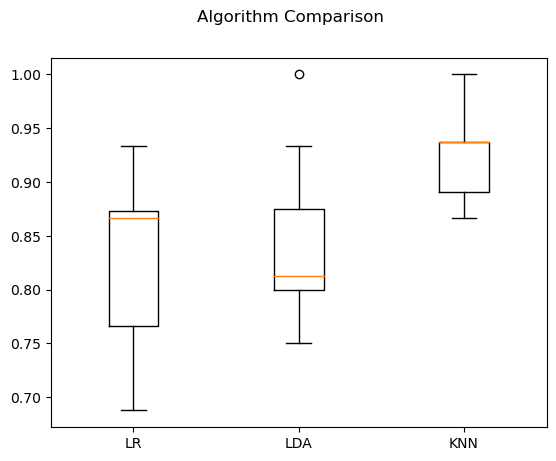

In [59]:
# Compare Algorithms Accuracy
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [60]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
predictions = KNN.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9743589743589743
[[ 6  1]
 [ 0 32]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.97      1.00      0.98        32

    accuracy                           0.97        39
   macro avg       0.98      0.93      0.95        39
weighted avg       0.98      0.97      0.97        39



First, I identified the task as being a binary classification task becuase patients can be healthy (0) or have parkinsons disease (1)

Then I performed correlation test between features in the data set agaisnt the target variable

The correlation test showed that spread1, spread2, PPE have strong positive correlations with the target variable.
The correlation test also showed that MDVP:Fo(Hz), MDVP:Flo(Hz), and HNR have strong negative correlations with the target variable.

I then performed a correlation test between the pairs of features that were strongly correlated with the target variables
The correlation test shows that spread1 and PEE were highly correlated

This allowed me to select the following features for analysis
spread1, spread2, MDVP:Fo(Hz), MDVP:Flo(Hz), and HNR

I initially decided to use a logistic regression model, but analysis of its performance only yeilded an accuracy score of 82.05%

I performed hyperparamter optimization using a grid search method.

The result of the hyperparameter optimized logistic regression model yeilded no change in accuracy.

Then, I decided to evaluate the performance of three different classifiers. The classifiers are Logistic Regression, Linear Discriminate analysis, and K-Nearest Neighbors using 10 fold cross-validation.

The accuracy results showed:
Logistic Regression = 82.21%
Linear Discriminat Analysis = 84.08%
K-Nearest Neighbors = 92.96%

I have selected K-Nearest neighbors for my machine learning model because the K-Nearest Neighbors model performed the best compared to the logistic regression, hyperparameter optimized logistic regression and linear disrcimination analysis.

The accuracy of the KNN model for the target variable status is approximately 97.44%, indicating that the model correctly predicts the status for patients in the test set 97.44% of the time.

The resulting confusion matrix for the K-Nearest Neighbor model
indicated that:
TN = 6
FP = 1
TP = 32
FN = 0

The resulting classification report indicates excellent results for KNN model.